# 052324 Figures 

In [295]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

## Input necessary data

In [4]:
# define testing data from actual experiments
exp_glass_data = pd.read_csv(Path(p, '100323_ZJ_exp_glass_final.csv'))
exp_ito_data = pd.read_csv(Path(p, '100323_ZJ_exp_ito_final.csv'))
exp_ito_data = exp_ito_data.drop(47)
exp_ito_data = exp_ito_data.reset_index(drop=True)

# create the specific number of data
exp_glass_data = exp_glass_data.sample(50, random_state=4)
exp_ito_data = exp_ito_data.sample(50, random_state=4)

X_exp_glass = exp_glass_data.drop(['exp_ene', 'exp_dfs', 'imax', 'width', 'length', 'fitting', 'aspect_ratio', 'volume', 'surface_area'], axis=1)
X_exp_glass['nsub'] = 1.52
yw_exp_glass = exp_glass_data['width']
yl_exp_glass = exp_glass_data['length']

X_exp_ito = exp_ito_data.drop(['exp_ene', 'exp_dfs', 'imax', 'width', 'length', 'fitting', 'aspect_ratio', 'volume', 'surface_area'], axis=1)
X_exp_ito['nsub'] = 1.975
yw_exp_ito = exp_ito_data['width']
yl_exp_ito = exp_ito_data['length']

# Figure 1

## Figure 1A

In [98]:
# 052223 AuNR os glass relative P8 absolute P7
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")

fig1a_glass_data = pd.read_csv(Path(p_data, '052223_Zhenyang_exp_glass.csv'))
fig1a_glass_data['exp_ene'] = [ast.literal_eval(df) for df in fig1a_glass_data['exp_ene']]
fig1a_glass_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1a_glass_data['exp_dfs']]
fig1a_glass_data['fitting'] = [ast.literal_eval(df) for df in fig1a_glass_data['fitting']]
print(fig1a_glass_data.shape)

# 091123 AuNR on ITO relative P5 absolute P4

fig1a_ito_data = pd.read_csv(Path(p_data, '091123_Zhenyang_exp_ito.csv'))
fig1a_ito_data['exp_ene'] = [ast.literal_eval(df) for df in fig1a_ito_data['exp_ene']]
fig1a_ito_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1a_ito_data['exp_dfs']]
fig1a_ito_data['fitting'] = [ast.literal_eval(df) for df in fig1a_ito_data['fitting']]
print(fig1a_ito_data.shape)

(38, 11)
(62, 11)


In [581]:
# part_num_glass = 7
# width_glass = fig1_glass_data['width'][part_num_glass-1]

# fig1_ito_data['dif_width'] = abs(fig1_ito_data['width'] - width_glass)
# fig1_ito_data[fig1_ito_data['dif_width'] == fig1_ito_data['dif_width'].min()]

part_num_ito = 23
width_ito = fig1_ito_data['width'][part_num_ito-1]
print(width_ito)

fig1_glass_data['dif_width'] = abs(fig1_glass_data['width'] - width_ito)
fig1_glass_data[fig1_glass_data['dif_width'] == fig1_glass_data['dif_width'].min()]

# fig1_ito_data[fig1_ito_data['width'] - width_glass]

31.4504


,exp_ene,exp_dfs,fitting,imax,eres,linewidth,width,length,aspect_ratio,volume,surface_area,dif_width
4,"[2.65590681652542, 2.6514202069882, 2.64694924...","[0.0073808503423951, 0.0050724311490632, 0.011...","[0.01146877410787831, 0.011562460120154992, 0....",1.152206,1.923694,0.109805,29.6628,77.2301,2.603601,46537.537957,7196.95212,1.7876


AuNR on glass width 29.4556, length 89.6873
AuNR on ITO width 29.5128, length 87.4726


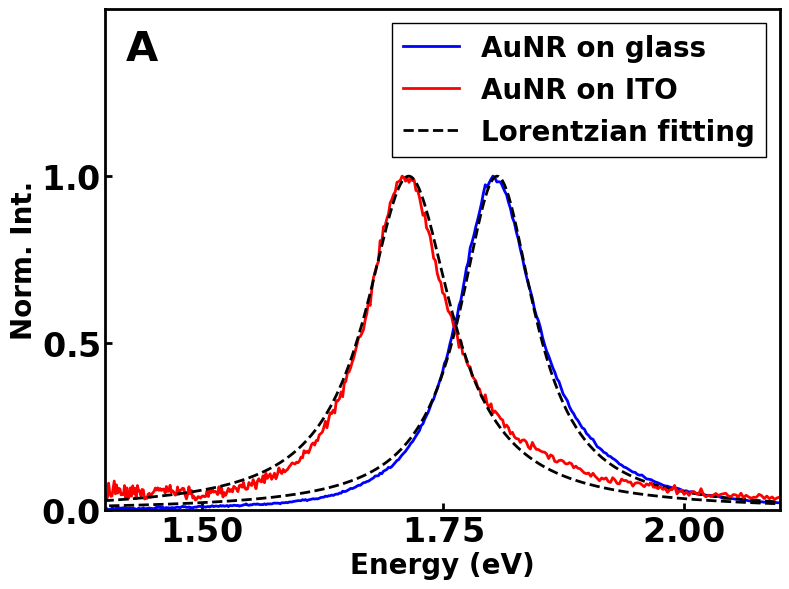

In [591]:
fig, ax = plt.subplots()

# AuNR on glass
part_num = 1
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1a_glass_data['exp_ene'][part_num-1], fig1a_glass_data['exp_dfs'][part_num-1])
fitting_exp_glass = Lorentzian.func(fig1a_glass_data['exp_ene'][part_num-1], max_int_glass, eres_glass, linewidth_glass)

ax.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fig1a_glass_data['exp_dfs'][part_num-1]) for i in fig1a_glass_data['exp_dfs'][part_num-1]], c='b', lw=2, label='AuNR on glass')
ax.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fitting_exp_glass) for i in fitting_exp_glass], c='k', lw=2, ls='--')

print(f"AuNR on glass width {fig1a_glass_data['width'][part_num-1]}, length {fig1a_glass_data['length'][part_num-1]}")

# AuNR on ITO
# part_num = 59
part_num = 3
max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1a_ito_data['exp_ene'][part_num-1], fig1a_ito_data['exp_dfs'][part_num-1])
fitting_exp_ito = Lorentzian.func(fig1a_ito_data['exp_ene'][part_num-1], max_int_ito, eres_ito, linewidth_ito)

ax.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fig1a_ito_data['exp_dfs'][part_num-1]) for i in fig1a_ito_data['exp_dfs'][part_num-1]], c='r', lw=2, label='AuNR on ITO')
ax.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fitting_exp_ito) for i in fitting_exp_ito], c='k', lw=2, ls='--', label='Lorentzian fitting')

print(f"AuNR on ITO width {fig1a_ito_data['width'][part_num-1]}, length {fig1a_ito_data['length'][part_num-1]}")

ax.set_xticks([1.5, 1.75, 2.0])
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Norm. Int.')
ax.set_xlim(1.4, 2.1)
ax.set_ylim(0, 1.5)

ax.text(0.03, 0.96, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)
plt.legend(fontsize=20)

# plt.savefig("ITO_Figure1A.svg", format="svg", dpi=300)

## Figure 1B

In [585]:
# fig1b_glass_data = pd.read_csv(Path(p_data, 'P007_rod_glass_W_29.75_L_90.51.txt'))
# fig1b_glass_data['sim_ene'] = 1240 / fig1b_glass_data['wav']
# fig1b_ito_data = pd.read_csv(Path(p_data, 'P059_rod_ito_W_28.04_L_92.75.txt'))
# fig1b_ito_data['sim_ene'] = 1240 / fig1b_ito_data['wav']

fig1b_glass_data = pd.read_csv(Path(p_data, 'P001_rod_glass_W_30.46_L_89.69.txt'))
fig1b_glass_data['sim_ene'] = 1240 / fig1b_glass_data['wav']
fig1b_ito_data = pd.read_csv(Path(p_data, 'P003_rod_ito_W_28.61_L_88.77.txt'))
fig1b_ito_data['sim_ene'] = 1240 / fig1b_ito_data['wav']

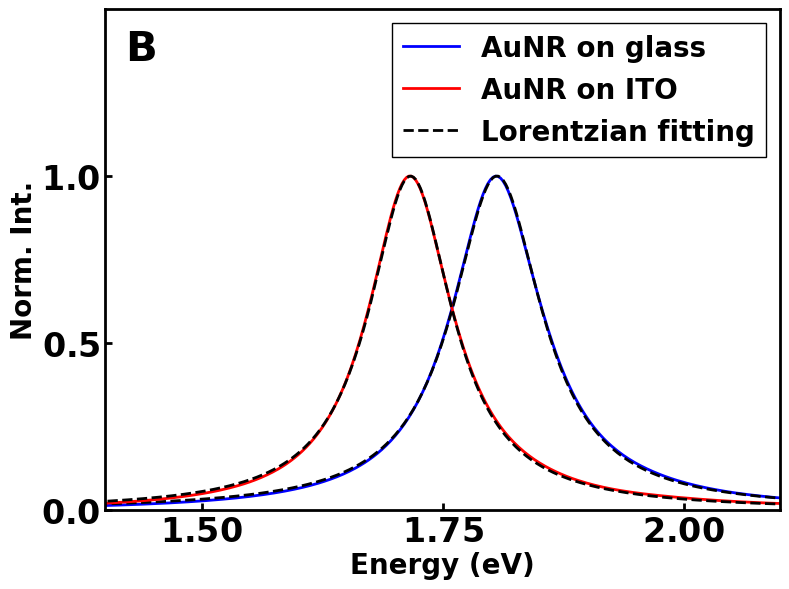

In [592]:
fig, ax = plt.subplots() 

# AuNR on glass
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat'])
fitting_sim_glass = Lorentzian.func(fig1b_glass_data['sim_ene'], max_int_glass, eres_glass, linewidth_glass)

ax.plot(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat']/max(fig1b_glass_data['cscat']), c='b', lw=2, label='AuNR on glass')
ax.plot(fig1b_glass_data['sim_ene'], fitting_sim_glass/max(fitting_sim_glass), c='k', lw=2, ls='--')

# AuNR on ITO
max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat'])
fitting_sim_ito = Lorentzian.func(fig1b_ito_data['sim_ene'], max_int_ito, eres_ito, linewidth_ito)

ax.plot(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat']/max(fig1b_ito_data['cscat']), c='r', lw=2, label='AuNR on ITO')
ax.plot(fig1b_ito_data['sim_ene'], fitting_sim_ito/max(fitting_sim_ito), c='k', lw=2, ls='--', label='Lorentzian fitting')

ax.set_xticks([1.5, 1.75, 2.0])
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Norm. Int.')
ax.set_xlim(1.4, 2.1)
ax.set_ylim(0, 1.5)

ax.text(0.03, 0.96, 'B', ha='left', va='top', transform=ax.transAxes, fontsize=30)
plt.legend(fontsize=20)

# plt.savefig("ITO_Figure1B.svg", format="svg", dpi=300)

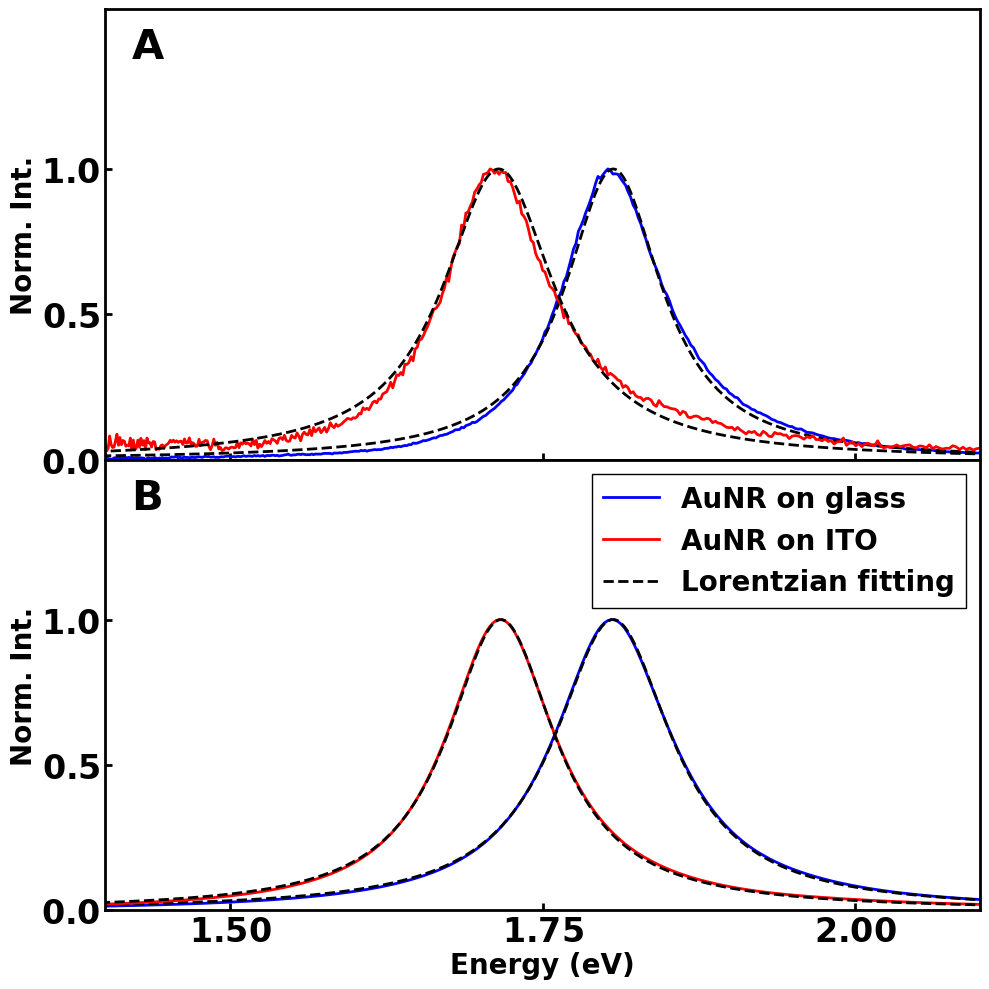

In [604]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'hspace': 0})

# Plot for AuNR on glass and AuNR on ITO (first figure)
part_num = 1
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1a_glass_data['exp_ene'][part_num-1], fig1a_glass_data['exp_dfs'][part_num-1])
fitting_exp_glass = Lorentzian.func(fig1a_glass_data['exp_ene'][part_num-1], max_int_glass, eres_glass, linewidth_glass)

ax1.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fig1a_glass_data['exp_dfs'][part_num-1]) for i in fig1a_glass_data['exp_dfs'][part_num-1]], c='b', lw=2, label='AuNR on glass')
ax1.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fitting_exp_glass) for i in fitting_exp_glass], c='k', lw=2, ls='--')

part_num = 3
max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1a_ito_data['exp_ene'][part_num-1], fig1a_ito_data['exp_dfs'][part_num-1])
fitting_exp_ito = Lorentzian.func(fig1a_ito_data['exp_ene'][part_num-1], max_int_ito, eres_ito, linewidth_ito)

ax1.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fig1a_ito_data['exp_dfs'][part_num-1]) for i in fig1a_ito_data['exp_dfs'][part_num-1]], c='r', lw=2, label='AuNR on ITO')
ax1.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fitting_exp_ito) for i in fitting_exp_ito], c='k', lw=2, ls='--', label='Lorentzian fitting')

ax1.set_yticks([0.0, 0.5, 1.0])
ax1.set_ylabel('Norm. Int.')
ax1.set_xlim(1.4, 2.1)
ax1.set_ylim(0, 1.55)
ax1.text(0.03, 0.96, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)
# ax1.legend(fontsize=20)

# Plot for simulated data (second figure)
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat'])
fitting_sim_glass = Lorentzian.func(fig1b_glass_data['sim_ene'], max_int_glass, eres_glass, linewidth_glass)

ax2.plot(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat']/max(fig1b_glass_data['cscat']), c='b', lw=2, label='AuNR on glass')
ax2.plot(fig1b_glass_data['sim_ene'], fitting_sim_glass/max(fitting_sim_glass), c='k', lw=2, ls='--')

max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat'])
fitting_sim_ito = Lorentzian.func(fig1b_ito_data['sim_ene'], max_int_ito, eres_ito, linewidth_ito)

ax2.plot(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat']/max(fig1b_ito_data['cscat']), c='r', lw=2, label='AuNR on ITO')
ax2.plot(fig1b_ito_data['sim_ene'], fitting_sim_ito/max(fitting_sim_ito), c='k', lw=2, ls='--', label='Lorentzian fitting')

ax2.set_xticks([1.5, 1.75, 2.0])
ax2.set_yticks([0.0, 0.5, 1.0])
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('Norm. Int.')
ax2.set_xlim(1.4, 2.1)
ax2.set_ylim(0, 1.55)
ax2.text(0.03, 0.96, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)
ax2.legend(fontsize=20)

plt.subplots_adjust(hspace=0)  # Remove the space between plots

## Old Figure 1B 

In [53]:
glass_exp_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_glass_final.csv'))
glass_exp_data['exp_ene'] = [ast.literal_eval(df) for df in glass_exp_data['exp_ene']]
glass_exp_data['exp_dfs'] = [ast.literal_eval(df) for df in glass_exp_data['exp_dfs']]
glass_exp_data['fitting'] = [ast.literal_eval(df) for df in glass_exp_data['fitting']]
print(glass_exp_data.shape)

p_ito = Path('Z:/Katsuya Shiratori/004_coding/python/ITO_project/zhenyang_ito_analysis')
ito_exp_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_ito_final.csv'))
ito_exp_data['exp_ene'] = [ast.literal_eval(df) for df in ito_exp_data['exp_ene']]
ito_exp_data['exp_dfs'] = [ast.literal_eval(df) for df in ito_exp_data['exp_dfs']]
ito_exp_data['fitting'] = [ast.literal_eval(df) for df in ito_exp_data['fitting']]
print(ito_exp_data.shape)

# particles on glass outliers particles 47, 67, 71
outliers_particles = [47, 67, 71]
glass_exp_data = glass_exp_data.drop(outliers_particles)
glass_exp_data.reset_index(drop=True, inplace=True)
print(glass_exp_data.shape)

(132, 11)
(149, 11)
(129, 11)


In [54]:
# make controled distribution

glass_exp_data = glass_exp_data[(glass_exp_data['width'] > 28.5) & (glass_exp_data['width'] < 30.5)]
ito_exp_data = ito_exp_data[(ito_exp_data['width'] > 28) & (ito_exp_data['width'] < 30)]

glass_exp_data = glass_exp_data[(glass_exp_data['length'] > 80) & (glass_exp_data['length'] < 105)]
ito_exp_data = ito_exp_data[(ito_exp_data['length'] > 80) & (ito_exp_data['length'] < 99)]

print(glass_exp_data.shape, ito_exp_data.shape)

(30, 11) (45, 11)


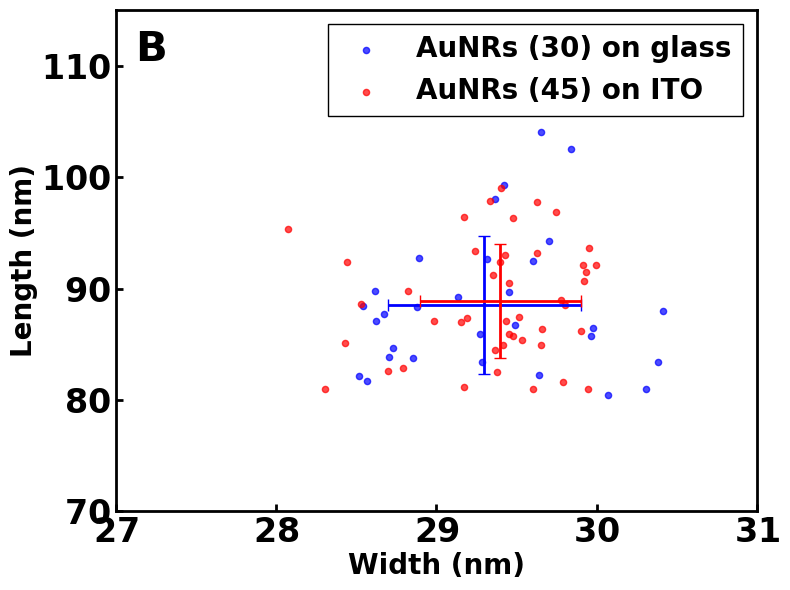

In [55]:
fig, ax = plt.subplots()

width_mean_glass = round(glass_exp_data['width'].mean(), 1)
width_std_glass = round(glass_exp_data['width'].std(), 1)
length_mean_glass = round(glass_exp_data['length'].mean(), 1)
length_std_glass = round(glass_exp_data['length'].std(), 1)

width_mean_ito = round(ito_exp_data['width'].mean(), 1)
width_std_ito = round(ito_exp_data['width'].std(), 1)
length_mean_ito = round(ito_exp_data['length'].mean(), 1)
length_std_ito = round(ito_exp_data['length'].std(), 1)

# label_glass = f'AuNRs ({glass_exp_data.shape[0]}) on glass: W {width_mean_glass} ± {width_std_glass}, L {length_mean_glass} ± {length_std_glass} nm'
label_glass = f'AuNRs ({glass_exp_data.shape[0]}) on glass'
ax.scatter(glass_exp_data['width'], glass_exp_data['length'], s=20, color='blue', alpha=0.7, label=label_glass)
ax.errorbar(width_mean_glass, length_mean_glass, yerr=length_std_glass, xerr=width_std_glass, color='blue', linewidth=2, capsize=4)

# label_ito = f'AuNRs ({ito_exp_data.shape[0]}) on ITO: W {width_mean_ito} ± {width_std_ito}, L {length_mean_ito} ± {length_std_ito} nm'
label_ito = f'AuNRs ({ito_exp_data.shape[0]}) on ITO'
ax.scatter(ito_exp_data['width'], ito_exp_data['length'], s=20, color='red', alpha=0.7, label=label_ito)
ax.errorbar(width_mean_ito, length_mean_ito, yerr=length_std_ito, xerr=width_std_ito, color='red', linewidth=2, capsize=4)

ax.text(0.03, 0.96, 'B', ha='left', va='top', transform=ax.transAxes, fontsize=30)
ax.set_ylim(70, 115)
ax.set_xlim(27, 31)

ax.set_xlabel('Width (nm)')
ax.set_ylabel('Length (nm)')
ax.legend(fontsize=20)

# plt.savefig("ITO_Figure1B.svg", format="svg", dpi=300)

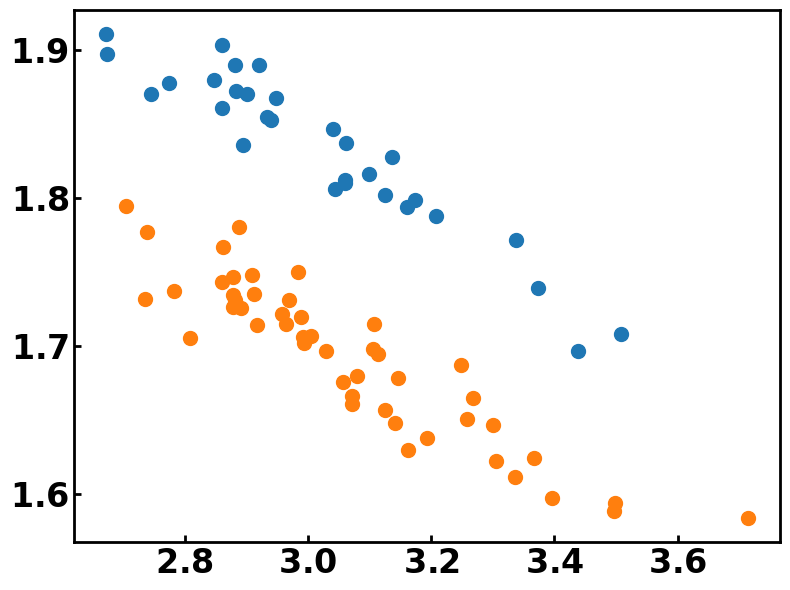

In [35]:
plt.scatter(glass_exp_data['aspect_ratio'], glass_exp_data['eres'])
plt.scatter(ito_exp_data['aspect_ratio'], ito_exp_data['eres'])

# Figure 2

In [413]:
p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/input_data/SPP2023")

# all glass data
glass_data = pd.read_csv(Path(p, '090723_glass_training.csv'))
glass_data['ratio'] = glass_data['length'] / glass_data['width']
glass_data = glass_data.drop(['corrcoef'], axis=1)

# all ITO data
ito_data = pd.read_csv(Path(p, '111623_ito_training.csv'))
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)

# # define input and output
# X_glass = glass_data.drop(['width', 'length', 'imax', 'ratio'], axis=1)
# yw_glass = glass_data['width']
# yl_glass = glass_data['length']

# # define input and output
# X_ito = ito_data.drop(['width', 'length', 'imax', 'ratio'], axis=1)
# yw_ito = ito_data['width']
# yl_ito = ito_data['length']

## Figure 2A

In [414]:
print(glass_data.shape)
# exclude the distribution with longer linwdith
glass_data = glass_data[(glass_data['width'] > ito_data['width'].min()) & (glass_data['width'] < ito_data['width'].max()) 
                       & (glass_data['length'] > ito_data['length'].min()) & (glass_data['length'] < ito_data['length'].max())]
print(glass_data.shape)

# ratio_lower_thre = 2.5
# ratio_upper_thre = 3.6
# print(glass_data.shape, ito_data.shape)
# glass_data = glass_data[(glass_data['ratio'] > ratio_lower_thre) & (glass_data['ratio'] < ratio_upper_thre)]
# ito_data = ito_data[(ito_data['ratio'] > ratio_lower_thre) & (ito_data['ratio'] < ratio_upper_thre)]
# print(glass_data.shape, ito_data.shape)

# Randomly sample 1000 rows from each dataframe
glass_sample = glass_data.sample(n=1001, random_state=2)
ito_sample = ito_data.sample(n=1000, random_state=2)

# further control the dataset so that all aspect ratio in glass can fall into the range of ITO's ratio
ito_ratio_min = ito_data['ratio'].min()
ito_ratio_max = ito_data['ratio'].max()

print(glass_sample.shape)
glass_sample = glass_sample[(glass_sample['ratio'] > ito_ratio_min) & (glass_sample['ratio'] < ito_ratio_max)]
glass_sample = glass_sample.reset_index(drop=True)
print(glass_sample.shape)

(1206, 6)
(1180, 6)
(1001, 6)
(1000, 6)


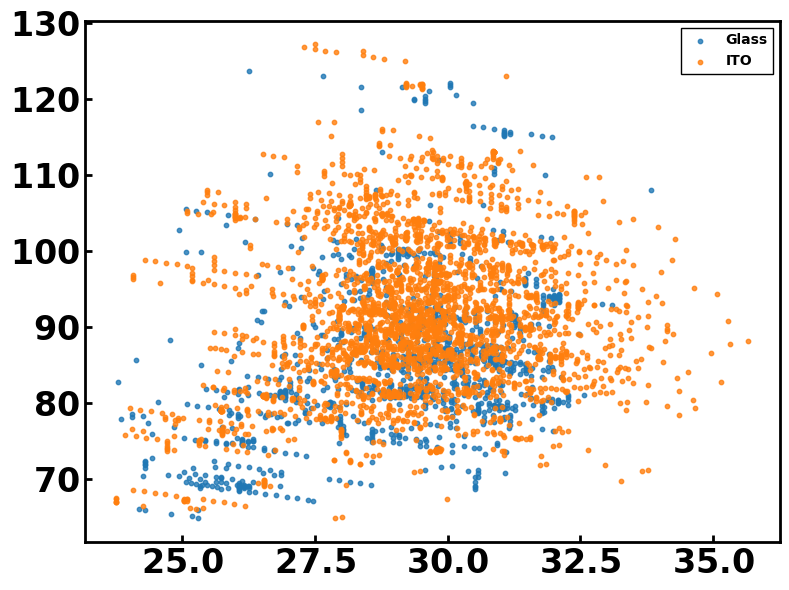

In [415]:
plt.scatter(glass_data['width'], glass_data['length'], s=10, alpha=0.8, label='Glass')
plt.scatter(ito_data['width'], ito_data['length'], s=10, alpha=0.8, label='ITO')
plt.legend()

# plt.scatter(glass_sample['width'], glass_sample['length'])
# plt.scatter(ito_sample['width'], ito_sample['length'])
# plt.xlim(10, 120)
# plt.ylim(10, 120)

[]

C:\Users\katsuya2\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\katsuya2\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


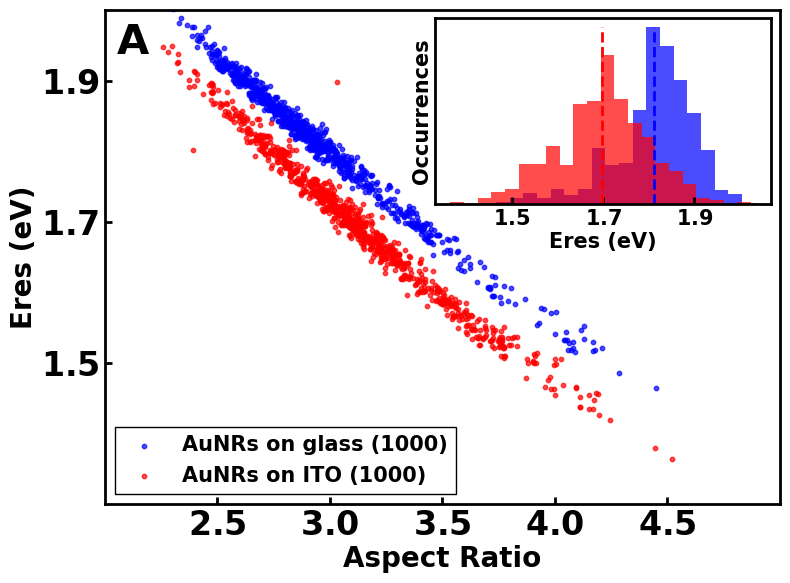

In [416]:
fig, ax_main = plt.subplots()

ax_main.scatter(glass_sample['ratio'], glass_sample['eres'], s=10, c='b', alpha=0.7, label=f'AuNRs on glass ({glass_sample.shape[0]})')
ax_main.scatter(ito_sample['ratio'], ito_sample['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_sample.shape[0]})')
ax_main.set_xlabel('Aspect Ratio')
ax_main.set_ylabel('Eres (eV)')
ax_main.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax_main.set_yticks([1.5, 1.7, 1.9])
ax_main.set_xlim(2.0, 5.0)
ax_main.set_ylim(1.3, 2.0)
ax_main.legend(loc='lower left', fontsize=15)
ax_main.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)

# Create inset figure
ax_inset = fig.add_axes([0.55, 0.64, 0.42, 0.31])  # Position inset at upper right

binwidth = 0.03
target1 = glass_sample['eres']
mean1 = target1.mean()
n1, bins1, patches1 = ax_inset.hist(target1, bins=np.arange(min(target1), max(target1) + binwidth, binwidth), color='blue', alpha=0.7)

target2 = ito_sample['eres']
mean2 = target2.mean()
n2, bins2, patches2 =ax_inset.hist(target2, bins=np.arange(min(target2), max(target2) + binwidth, binwidth), color='red', alpha=0.7)

max_count = max(max(n1), max(n2))
ax_inset.vlines(mean1, 0, max_count, color='b', ls='--', lw=2)
ax_inset.vlines(mean2, 0, max_count, color='r', ls='--', lw=2)

ax_inset.set_xlabel('Eres (eV)', fontsize=15)
ax_inset.set_ylabel('Occurrences', fontsize=15)
ax_inset.tick_params(axis='both', which='major', labelsize=15)
ax_inset.set_xticks([1.5, 1.7, 1.9])
ax_inset.set_yticks([])

## Figure 2B

### numerical correction

In [417]:
def calc_dif(idx, ito_data, glass_aranged_data):
    Eres_glass = glass_aranged_data['eres'][idx]
    Linewidth_glass = glass_aranged_data['linewidth'][idx]
    AR_glass = glass_aranged_data['ratio'][idx]

    upper_min = ito_data[ito_data['ratio'] > AR_glass]['ratio'].min()
    lower_max = ito_data[ito_data['ratio'] < AR_glass]['ratio'].max()

    if (upper_min - AR_glass) > (AR_glass - lower_max):
        AR_ito_closest = lower_max
    else:
        AR_ito_closest = upper_min

    Eres_ito = ito_data[ito_data['ratio'] == AR_ito_closest]['eres']
    Linewidth_ito = ito_data[ito_data['ratio'] == AR_ito_closest]['linewidth']
    dEres_IG = Eres_ito - Eres_glass
    dLinewidth_IG = Linewidth_ito - Linewidth_glass
    return dEres_IG, dLinewidth_IG


def calculate_mean(lst):
    return sum(lst) / len(lst)

In [418]:
dnsub_IG = 1.975 - 1.52
dEres_IG_list = []
dLinewidth_IG_list = []
for idx in range(glass_sample.shape[0]):
    dEres_IG, dLinewidth_IG = calc_dif(idx, ito_data, glass_sample)
    if (dEres_IG.shape == (1,)) and (dLinewidth_IG.shape == (1,)): 
        dEres_IG_list.append(dEres_IG.values)
        dLinewidth_IG_list.append(dLinewidth_IG.values)
        
print(len(dEres_IG_list), len(dLinewidth_IG_list))

dEres_IG_mean = calculate_mean(dEres_IG_list)
dLinewidth_IG_mean = calculate_mean(dLinewidth_IG_list)
C = dEres_IG_mean / dnsub_IG
# D = dLinewidth_IG_mean / dnsub_IG
# print(C, D)

tio2_nsub = 2.358
al2o3_nsub = 1.762
glass_nsub = 1.52
ito_nsub = 1.975

ito_Eres = C*(ito_nsub - glass_nsub) + glass_sample['eres']
# ito_Linewidth = D*(ito_nsub - glass_nsub) + glass_aranged_data['linewidth']

# tio2_Eres = C*(tio2_nsub - glass_nsub) + glass_aranged_data['eres']
# tio2_Linewidth = D*(tio2_nsub - glass_nsub) + glass_aranged_data['linewidth']

# al2o3_Eres = C*(al2o3_nsub - glass_nsub) + glass_aranged_data['eres']
# al2o3_Linewidth = D*(al2o3_nsub - glass_nsub) + glass_aranged_data['linewidth']

999 999


[]

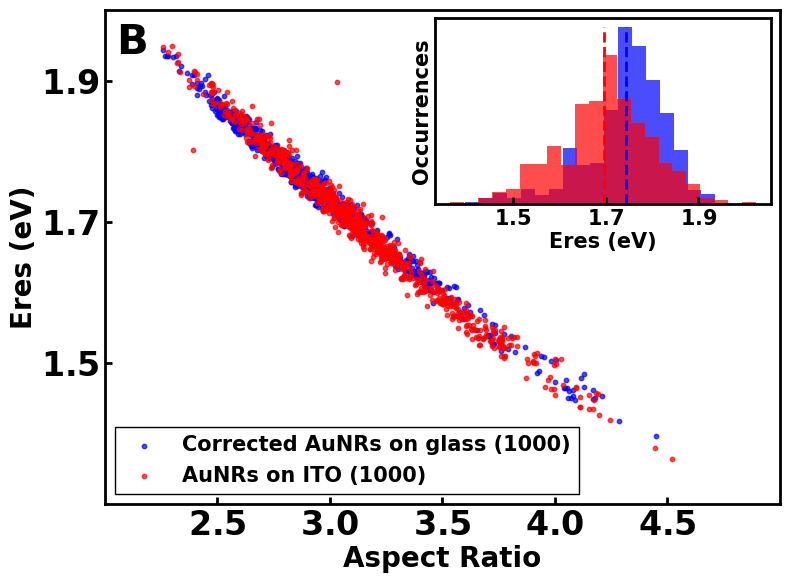

In [419]:
fig, ax_main = plt.subplots()

ax_main.scatter(glass_sample['ratio'], ito_Eres, s=10, c='b', alpha=0.7, label=f'Corrected AuNRs on glass ({glass_sample.shape[0]})')
ax_main.scatter(ito_sample['ratio'], ito_sample['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_sample.shape[0]})')
ax_main.set_xlabel('Aspect Ratio')
ax_main.set_ylabel('Eres (eV)')

ax_main.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax_main.set_yticks([1.5, 1.7, 1.9])
ax_main.set_xlim(2.0, 5.0)
ax_main.set_ylim(1.3, 2.0)
ax_main.legend(loc='lower left', fontsize=15)
ax_main.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax.transAxes, fontsize=30)

# Create inset figure
ax_inset = fig.add_axes([0.55, 0.64, 0.42, 0.31])  # Position inset at upper right

binwidth = 0.03
target1 = ito_Eres
mean1 = calculate_mean(target1)
n1, bins1, patches1 = ax_inset.hist(target1, bins=np.arange(min(target1), max(target1) + binwidth, binwidth), color='blue', alpha=0.7)

target2 = ito_sample['eres']
mean2 = target2.mean()
n2, bins2, patches2 =ax_inset.hist(target2, bins=np.arange(min(target2), max(target2) + binwidth, binwidth), color='red', alpha=0.7)

max_count = max(max(n1), max(n2))
ax_inset.vlines(mean1, 0, max_count, color='b', ls='--', lw=2)
ax_inset.vlines(mean2, 0, max_count, color='r', ls='--', lw=2)

ax_inset.set_xlabel('Eres (eV)', fontsize=15)
ax_inset.set_ylabel('Occurrences', fontsize=15)
ax_inset.tick_params(axis='both', which='major', labelsize=15)
ax_inset.set_xticks([1.5, 1.7, 1.9])
ax_inset.set_yticks([])

### analytical correction

In [425]:
# Constants
omega_p = 9  # plasma frequency in eV
epsilon_inf = 9.84  # high-frequency dielectric constant
n_glass = 1.52  # effective refractive index for glass substrate
aspect_ratio = glass_sample['ratio']
n_X = 1.975  # refractive index for unknown substrate

# n_eff_glass = (n_glass + 1) / 2
# n_eff_X = (n_X + 1) / 2

alpha = 0.8
n_med = 1.0
n_eff_glass = alpha*n_med + n_glass*(1-alpha)
n_eff_X = alpha*n_med + n_X*(1-alpha)

# Depolarization factor L for the given aspect ratio
L = (1 + aspect_ratio)**-1.6

# Resonance energy for glass substrate
E_res_glass = omega_p / np.sqrt(n_eff_glass**2 / L + epsilon_inf - n_eff_glass**2)

# Resonance energy for unknown substrate
E_res_X = omega_p / np.sqrt(n_eff_X**2 / L + epsilon_inf - n_eff_X**2)

# Calculate the factor F
F = E_res_X / E_res_glass

print(E_res_glass.shape, E_res_X.shape, F.shape)

(1000,) (1000,) (1000,)


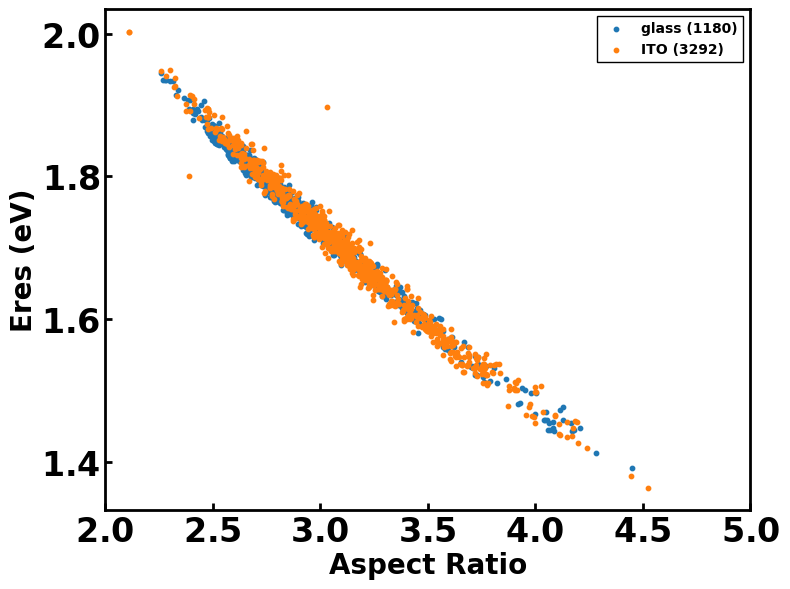

In [426]:
# Eres vs AR ITO and glass
plt.scatter(glass_sample['ratio'], glass_sample['eres']*F, s=10, label=f'glass ({glass_data.shape[0]})')
plt.scatter(ito_sample['ratio'], ito_sample['eres'], s=10, label=f'ITO ({ito_data.shape[0]})')

plt.xlabel('Aspect Ratio')
plt.ylabel('Eres (eV)')
plt.xlim(2, 5)
plt.legend()

[]

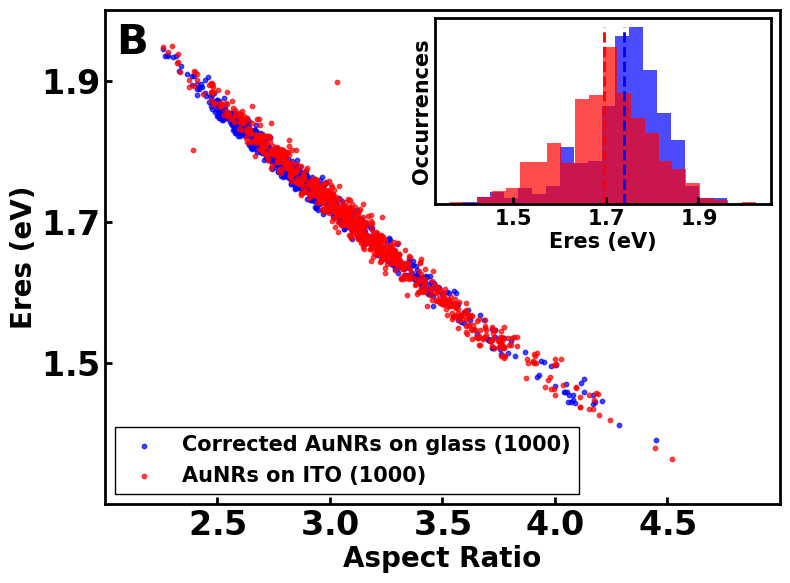

In [422]:
fig, ax_main = plt.subplots()

ax_main.scatter(glass_sample['ratio'], glass_sample['eres']*F, s=10, c='b', alpha=0.7, label=f'Corrected AuNRs on glass ({glass_sample.shape[0]})')
ax_main.scatter(ito_sample['ratio'], ito_sample['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_sample.shape[0]})')
ax_main.set_xlabel('Aspect Ratio')
ax_main.set_ylabel('Eres (eV)')

ax_main.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax_main.set_yticks([1.5, 1.7, 1.9])
ax_main.set_xlim(2.0, 5.0)
ax_main.set_ylim(1.3, 2.0)
ax_main.legend(loc='lower left', fontsize=15)
ax_main.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax.transAxes, fontsize=30)

# Create inset figure
ax_inset = fig.add_axes([0.55, 0.64, 0.42, 0.31])  # Position inset at upper right

binwidth = 0.03
target1 = glass_sample['eres']*F
mean1 = target1.mean()
n1, bins1, patches1 = ax_inset.hist(target1, bins=np.arange(min(target1), max(target1) + binwidth, binwidth), color='blue', alpha=0.7)

target2 = ito_sample['eres']
mean2 = target2.mean()
n2, bins2, patches2 =ax_inset.hist(target2, bins=np.arange(min(target2), max(target2) + binwidth, binwidth), color='red', alpha=0.7)

max_count = max(max(n1), max(n2))
ax_inset.vlines(mean1, 0, max_count, color='b', ls='--', lw=2)
ax_inset.vlines(mean2, 0, max_count, color='r', ls='--', lw=2)

ax_inset.set_xlabel('Eres (eV)', fontsize=15)
ax_inset.set_ylabel('Occurrences', fontsize=15)
ax_inset.tick_params(axis='both', which='major', labelsize=15)
ax_inset.set_xticks([1.5, 1.7, 1.9])
ax_inset.set_yticks([])

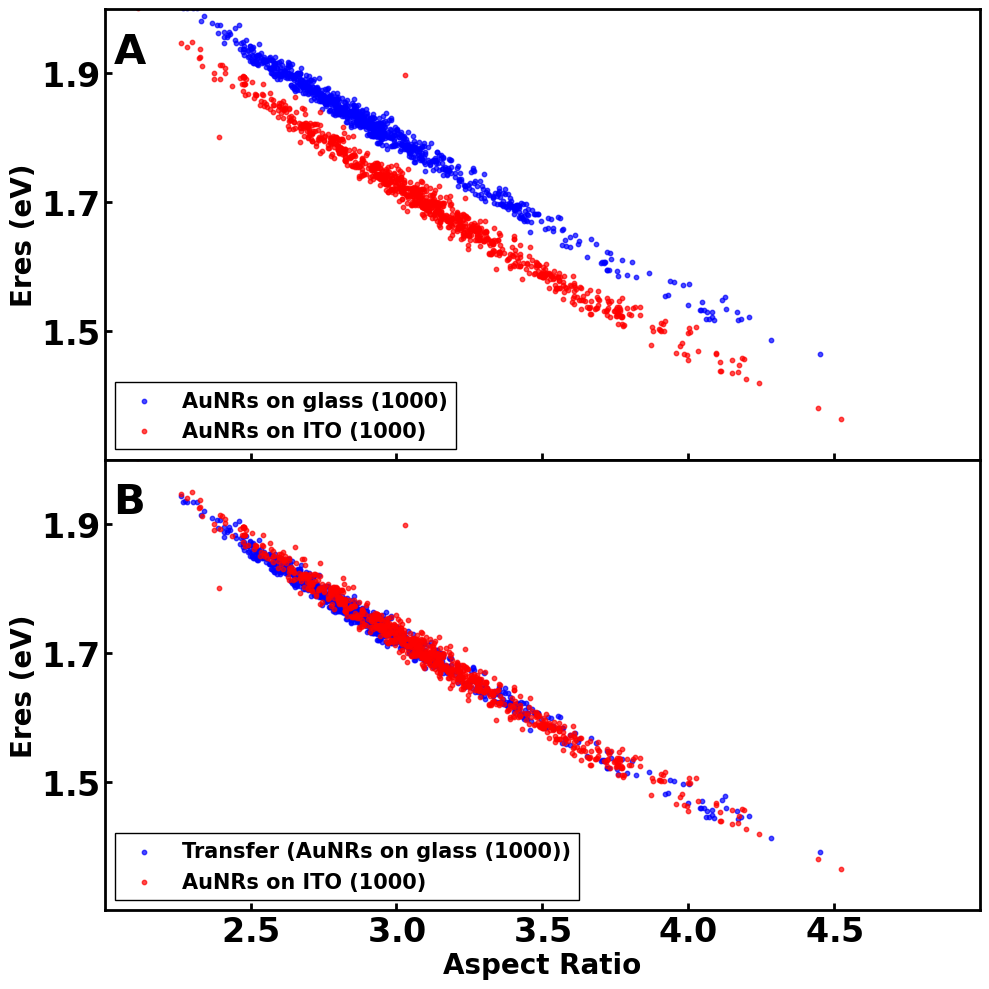

In [613]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'hspace': 0})

ax1.scatter(glass_sample['ratio'], glass_sample['eres'], s=10, c='b', alpha=0.7, label=f'AuNRs on glass ({glass_sample.shape[0]})')
ax1.scatter(ito_sample['ratio'], ito_sample['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_sample.shape[0]})')
ax1.set_xlabel('Aspect Ratio')
ax1.set_ylabel('Eres (eV)')
ax1.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax1.set_yticks([1.5, 1.7, 1.9])
ax1.set_xlim(2.0, 5.0)
ax1.set_ylim(1.3, 2.0)
ax1.legend(loc='lower left', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)


ax2.scatter(glass_sample['ratio'], glass_sample['eres']*F, s=10, c='b', alpha=0.7, label=f'Transfer (AuNRs on glass ({glass_sample.shape[0]}))')
ax2.scatter(ito_sample['ratio'], ito_sample['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_sample.shape[0]})')
ax2.set_xlabel('Aspect Ratio')
ax2.set_ylabel('Eres (eV)')
ax2.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax2.set_yticks([1.5, 1.7, 1.9])
ax2.set_xlim(2.0, 5.0)
ax2.set_ylim(1.3, 2.0)
ax2.legend(loc='lower left', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)


plt.subplots_adjust(hspace=0)  # Remove the space between plots

# Figure 3

## Figure 3A